In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdChemReactions
import os
import selfies as sf
from IPython.display import display_png
from rdkit.Chem.Draw import IPythonConsole

In [3]:
class CompVal():
    
    def __init__(self, selfie):
        IPythonConsole.ipython_useSVG = True
        self.selfie = selfie
        self.smiles = sf.decoder(self.selfie)
        self.mol = rdkit.Chem.MolFromSmiles(self.smiles)
        #self.mol = Chem.AddHs(self.mol)
        self.HBA = Descriptors.NumHAcceptors(self.mol) 
        self.HBD = Descriptors.NumHDonors(self.mol)
        self.ClogP = Descriptors.MolLogP(self.mol)
        self.MW = Descriptors.MolWt(self.mol)
        self.is_drug_like = None
    
    def draw_mol(self):
        img = Chem.Draw.MolToImage(self.mol)
        display_png(img)
        
    def validate(self):
        self.is_drug_like = (self.HBA) <= 10 & (self.HBD <= 5) & (self.ClogP >= 0 ) & (self.ClogP <= 5) & (self.MW <= 500)
        
    def remove_pentyl(self):
        pattern = Chem.MolFromSmarts('[CH2]-[CH2]-[CH2]-[CH2]-[CH3]')
        replacement = Chem.MolFromSmarts('[CH3]')
        mol = Chem.ReplaceSubstructs(self.mol, pattern, replacement)[0]
        mol = Chem.AddHs(mol)
        mol = Chem.RemoveHs(mol)
        self.mol = mol
        self.smiles = Chem.MolToSmiles(self.mol)
        
    def remove_allen(self):
        pattern = Chem.MolFromSmarts('[CH]=[CH]=[CH]=[CH2]')
        replacement = Chem.MolFromSmarts('[CH3]')
        mol = Chem.ReplaceSubstructs(self.mol, pattern, replacement)[0]
        mol = Chem.AddHs(mol)
        mol = Chem.RemoveHs(mol)
        self.mol = mol
        self.smiles = Chem.MolToSmiles(self.mol)
    
    #def remove_cycloprop(self):
        
    
    def remove_inner(self): # W sumie to nie działa xd
        pattern = Chem.MolFromSmarts('[CH2]-[CH2]-[CH2]-[CH2]')
        replacement = Chem.MolFromSmarts('[CH2]')
        mol = Chem.ReplaceSubstructs(self.mol, pattern, replacement)[0]
        components = Chem.GetMolFrags(mol, asMols=True)
        mol = Chem.CombineMols(components[0], components[1])
        mol = Chem.AddHs(mol)
        mol = Chem.RemoveHs(mol)
        self.mol = mol
        self.smiles = Chem.MolToSmiles(self.mol).replace('.','')
        self.mol = Chem.MolFromSmiles(self.smiles)
        
    def make_benzen(self):
        pass
        #reaction_smarts = 
        

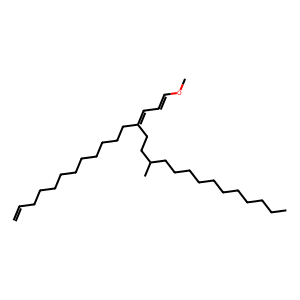

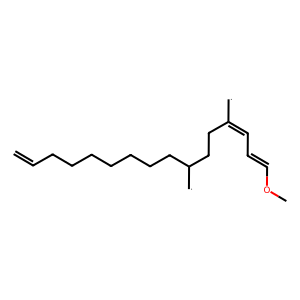

In [16]:
selfie = "[#Branch1][C][O][C][=C][C][=C][Branch2][Ring1][C][C][C][C][=Branch1][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][Ring1]"

comp_val = CompVal(selfie)
comp_val.draw_mol()
comp_val.remove_inner()
comp_val.remove_pentyl()
comp_val.remove_inner()
comp_val.remove_inner()
comp_val.draw_mol()